# Regex, languages and grammars

I'm going to use typing to make the code a bit easier to understand.

In [1]:
from typing import Set, Callable, List, Optional, Tuple

### Exercise

Return `True` if pattern appears anywhere in text
Please fill in the `match(          , text)` below.
For example, `match(your_code_here, text)`.

In [2]:
def search(pattern: str, text: str) -> bool:
    """True if pattern anywhere"""
    if pattern.startswith("^"):
        return match(pattern[1:], text)
    else:
        return match(".*" + pattern, text)


def match(pattern, text):
    """True if pattern at beginning of text"""
    pass


Return `True` if pattern appears at the start of text

For this quiz, please fill in the return values for:
* `if pattern == '':`
* `elif pattern == '$':`


In [3]:
def match(pattern: str, text: str) -> bool:

    if pattern == "":
        return True  # fill in this line
    elif pattern == "$":

        return text == ""  # fill in this line
    # you can ignore the following elif and else conditions
    # We'll implement them in the next quiz
    elif len(pattern) > 1 and pattern[1] in "*?":
        return True
    else:
        return True


Return `True` if pattern appears at the start of text

Please fill in the last line in this program.
Namely: `match(             ,           )`

We'll explain how we came to the code for the condition:
`elif len(pattern) > 1 and pattern[1] in '*?'` in the next video lecture

In [4]:
def match(pattern: str, text: str) -> bool:

    if pattern == "":
        return True
    elif pattern == "$":
        return text == ""
    elif len(pattern) > 1 and pattern[1] in "*?":
        p, op, pat = pattern[0], pattern[1], pattern[2:]
        if op == "*":
            return match_star(p, pat, text)
        elif op == "?":
            if match1(p, text) and match(pat, text[1:]):
                return True
            else:
                return match(pat, text)
    else:
        return match1(pattern[0], text) and match(
            pattern[1:], text[1:]
        )  # fill in this line

**Grammar**: description of a language.

```
a*b*c
````

**Language**: set of strings.

```
abc
aabccc
cc
```


## API vs Grammar (UI)

**Regex API**:

* Literal: `lit(s) -> lit('a') -> {a}`
* Sequence: `seq(x,y) -> seq(lit('a'), lit('b')) -> {ab}`
* Alternative: `alt(x,y) -> alt(lit('a'), lit('b')) -> {a, b}`
* Star: `star(x) -> star(lit('a')) -> {'', a, aa, aaa, ...}`
* Oneof: `oneof(x) -> oneof('abc') -> {a, b, c}`
* End-of-line: `eol -> eol -> {''} *only at the end -> seq(lit('a'), eol) -> {a}*only at the end`
* Dot: `dot -> dot -> {a, b, c, ...}`


**Concepts**

* Pattern
* Text
* Result
* Partial result
* Control of iteration

### Execrise
***User Instructions**

The function, matchset, takes a pattern and a text as input
and returns a set of remainders. For example, if matchset
were called with the pattern `star(lit(a))` and the text
`'aaab'`, matchset would return a set with elements
`{'aaab', 'aab', 'ab', 'b'}`, since `a*` can consume one, two
or all three of the a's in the text.

Your job is to complete this function by filling in the
`'dot'` and `'oneof'` operators to return the correct set of
remainders.

* `dot` :   matches any character.
* `oneof` : matches any of the characters in the string it is
       called with. `oneof('abc')` will match `a` or `b` or `c`.

In [5]:
def matchset(pattern: Tuple[str], text: str) -> set:
    "Match pattern at start of text; return a set of remainders of text."

    op, x, y = components(pattern)

    if "lit" == op:
        return set([text[len(x) :]]) if text.startswith(x) else null

    elif "seq" == op:
        return set(t2 for t1 in matchset(x, text) for t2 in matchset(y, t1))

    elif "alt" == op:
        return matchset(x, text) | matchset(y, text)

    elif "dot" == op:
        return set([text[1:]]) if text else null

    # your code here
    elif "oneof" == op:

        # it turns out x is a tuple

        # Option 1
        return set([text[1:]]) if text.startswith(x) else null

        # Option 2
        return set([text[1:]]) if any(text.startswith(c) for c in x) else null

        # Option 3 (mine)
        if text.startswith(x):
            return set([text[len(x) :]])

        if text.startswith(y):
            return set([text[len(y) :]])

        else:
            return null

    # your code here
    elif "eol" == op:
        return set([""]) if text == "" else null
    elif "star" == op:
        return set([text]) | set(
            t2 for t1 in matchset(x, text) for t2 in matchset(pattern, t1) if t1 != text
        )
    else:
        raise ValueError("unknown pattern: %s" % pattern)


null = frozenset()


def components(pattern: tuple):
    "Return the op, x, and y arguments; x and y are None if missing."

    x = pattern[1] if len(pattern) > 1 else None
    y = pattern[2] if len(pattern) > 2 else None
    return pattern[0], x, y


def test():
    assert matchset(("lit", "abc"), "abcdef") == set(["def"])
    assert matchset(
        ("seq", ("lit", "hi "), ("lit", "there ")), "hi there nice to meet you"
    ) == set(["nice to meet you"])
    assert matchset(("alt", ("lit", "dog"), ("lit", "cat")), "dog and cat") == set(
        [" and cat"]
    )
    assert matchset(("dot",), "am i missing something?") == set(
        ["m i missing something?"]
    )
    assert matchset(("oneof", "a"), "aabc123") == set(["abc123"])
    assert matchset(("eol",), "") == set([""])
    assert matchset(("eol",), "not end of line") == frozenset([])
    assert matchset(("star", ("lit", "hey")), "heyhey!") == set(
        ["!", "heyhey!", "hey!"]
    )

    return "tests pass"


print(test())

tests pass


### Exercise
***User Instructions***

Fill out the API by completing the entries for alt,
star, plus, and eol.

In [6]:
# fmt: off

# tuple[str, str]
def lit(string):  return ("lit", string)

# tuple[str, str, str]
def seq(x, y):    return ("seq", x, y)

# tuple[str, str, str]
def alt(x, y):    return ("alt", x, y)

# tuple[str, str]
def star(x):      return ("star", x)

# tuple[str, tuple[str, str]]
def plus(x):      return seq(x, star(x))

# tuple[str: "alt", tuple[str, str]: lit, str] -- opt(x) means that x is optional
def opt(x):       return alt(lit(''), x)

# tuple[str, tuple[str, ...]]
def oneof(chars): return ('oneof', tuple(chars)) 

# tuple[str]
dot = ('dot',)

# tuple[str]
eol = ("eol",)

def test():
    assert lit('abc')         == ('lit', 'abc')
    assert seq(('lit', 'a'), 
               ('lit', 'b'))  == ('seq', ('lit', 'a'), ('lit', 'b'))
    assert alt(('lit', 'a'), 
               ('lit', 'b'))  == ('alt', ('lit', 'a'), ('lit', 'b'))
    assert star(('lit', 'a')) == ('star', ('lit', 'a'))
    assert plus(('lit', 'c')) == ('seq', ('lit', 'c'), 
                                  ('star', ('lit', 'c')))
    assert opt(('lit', 'x'))  == ('alt', ('lit', ''), ('lit', 'x'))
    assert oneof('abc')       == ('oneof', ('a', 'b', 'c'))
    return 'tests pass'

print(test())

# fmt: on

tests pass


### Exercise
**User Instructions**

Complete the search and match functions. Match should
match a pattern only at the start of the text. Search
should match anywhere in the text.

In [7]:
def search(pattern: tuple, text: str):
    "Match pattern anywhere in text; return longest earliest match or None."
    for i in range(len(text)):
        m = match(pattern, text[i:])
        # your code here
        if m is not None:  # is not None -> allow empty string ''
            return m


def match(pattern: tuple, text: str):
    "Match pattern against start of text; return longest match found or None."
    remainders = matchset(pattern, text)
    # print(remainders)
    if remainders:
        shortest = min(remainders, key=len)
        # print(shortest)

        return text[: len(text) - len(shortest)]

        # Mine, not a very good solution but tests pass ¯\_(ツ)_/¯
        return "".join([c for c in text if c not in shortest])


def components(pattern: tuple):
    "Return the op, x, and y arguments; x and y are None if missing."
    x = pattern[1] if len(pattern) > 1 else None
    y = pattern[2] if len(pattern) > 2 else None
    return pattern[0], x, y


def matchset(pattern: tuple, text: str):
    "Match pattern at start of text; return a set of remainders of text."

    op, x, y = components(pattern)

    if "lit" == op:
        return set([text[len(x) :]]) if text.startswith(x) else null
    elif "seq" == op:
        return set(t2 for t1 in matchset(x, text) for t2 in matchset(y, t1))
    elif "alt" == op:
        return matchset(x, text) | matchset(y, text)
    elif "dot" == op:
        return set([text[1:]]) if text else null
    elif "oneof" == op:
        return set([text[1:]]) if text.startswith(x) else null
    elif "eol" == op:
        return set([""]) if text == "" else null
    elif "star" == op:
        return set([text]) | set(
            t2 for t1 in matchset(x, text) for t2 in matchset(pattern, t1) if t1 != text
        )
    else:
        raise ValueError("unknown pattern: %s" % pattern)


null = frozenset()


def lit(string):
    return ("lit", string)


def seq(x, y):
    return ("seq", x, y)


def alt(x, y):
    return ("alt", x, y)


def star(x):
    return ("star", x)


def plus(x):
    return seq(x, star(x))


def opt(x):
    return alt(lit(""), x)


def oneof(chars):
    return ("oneof", tuple(chars))


dot = ("dot",)
eol = ("eol",)


def test():
    assert match(("star", ("lit", "a")), "aaabcd") == "aaa"
    assert match(("alt", ("lit", "b"), ("lit", "c")), "ab") == None
    assert match(("alt", ("lit", "b"), ("lit", "a")), "ab") == "a"
    assert search(("alt", ("lit", "b"), ("lit", "c")), "ab") == "b"
    return "tests pass"


print(test())

tests pass


## Interpreter vs compiler

Pattern -> language -> interpreter

**Interpreter**: takes a data structure (`pattern` in this case) and operates on that.

**Compiler**: takes the `pattern` and returns an object `c()`, then that object is applied `c(text)`.


To move from interpreter to compiler, we take the indiviual statements like `if "lit" == op`, we throw them into various parts of the compiler. Each of those parts lives in the constructor for that pattern:

In [8]:
# interpreter
def lit(x: str) -> tuple:
    return ("lit", x)


pat = lit("a")

print(pat)

# compiler
def lit(x: str) -> Callable:
    return lambda text: set([text[len(x) :]]) if text.startswith(x) else null


pat = lit("a")

print(pat)

('lit', 'a')
<function lit.<locals>.<lambda> at 0x7fe5804f89e0>


In [9]:
assert isinstance(pat, Callable)

In [10]:
pat("a string")

{' string'}

In compilers there are 2 descriptions, one for what the `pattern` looks like and another one for what the compiled object `c()` looks like.


Compiler targets:

* Machine code (C, C++, Go...)
* Virtual machine (Java, Python...)

### Execise
**User Instructions**

Write the compiler for `alt(x, y)` in the same way that we wrote the compiler for `lit(s)` and `seq(x, y)`.

```python
def matchset(pattern, text):
    op, x, y = components(pattern)
    if 'lit' == op:
        return set([text[len(x):]]) if text.startswith(x) else null
    elif 'seq' == op:
        return set(t2 for t1 in matchset(x, text) for t2 in matchset(y, t1))
    elif 'alt' == op:
        return matchset(x, text) | matchset(y, text)
```

In [11]:
def lit(s: str) -> Callable:
    return lambda text: set([text[len(s) :]]) if text.startswith(s) else null


def seq(x: Callable, y: Callable) -> Callable:
    return lambda text: set.union(*map(y, x(text)))


def alt(x: Callable, y: Callable) -> Callable:
    # your code here

    # Sol
    return lambda text: x(text) | y(text)
    
    # Mine
    return lambda text: set.union(x(text), y(text))


null = frozenset([])


def test():
    g = alt(lit("a"), lit("b"))
    assert g("abc") == set(["bc"])
    return "test passes"


print(test())

test passes


### Exercise

**User Instructions**

Fill out the function `match(pattern, text)`, so that 
remainders is properly assigned. 

In [12]:
def match(pattern, text):
    "Match pattern against start of text; return longest match found or None."
    
    remainders = pattern(text)  # your code here.
    if remainders:
        shortest = min(remainders, key=len)
        return text[: len(text) - len(shortest)]


def lit(s):
    return lambda t: set([t[len(s) :]]) if t.startswith(s) else null


def seq(x, y):
    return lambda t: set().union(*map(y, x(t)))


def alt(x, y):
    return lambda t: x(t) | y(t)


def oneof(chars):
    return lambda t: set([t[1:]]) if (t and t[0] in chars) else null


dot = lambda t: set([t[1:]]) if t else null
eol = lambda t: set([""]) if t == "" else null


def star(x):
    return lambda t: (
        set([t]) | set(t2 for t1 in x(t) if t1 != t for t2 in star(x)(t1))
    )


null = frozenset([])


def test():
    assert match(star(lit("a")), "aaaaabbbaa") == "aaaaa"
    assert match(lit("hello"), "hello how are you?") == "hello"
    assert match(lit("x"), "hello how are you?") == None
    assert match(oneof("xyz"), "x**2 + y**2 = r**2") == "x"
    assert match(oneof("xyz"), "   x is here!") == None
    return "tests pass"

print(test())

tests pass


Remember, here a pattern is a function, such that

    pattern(text) = set([remainder1, remainder2, ...])
    
For example,

    pat = lit('the')
    text = 'them there eyes'
    pat(text)  == set(['m there eyes'])
    
That is, lit('the') is a pattern, compiled into a function. When you call that function with text as the argument, you get back a set of possible remainders. Since this is a literal, if the literal matches, there is only one way it can match, and thus one possible remainder. If it doesn't match, there will be the empty set of remainders:

    pat = lit('the')
    text = 'whole lot of trouble'
    pat(text)  == set()
    
If a pattern can match different things, then the set of possible remainders (the result of applying the pattern function to the text) can have more than one element:

    pat = alt(lit('the'), lit('them'))
    text = 'them there eyes'
    pat(text)  == set([' there eyes', 'm there eyes'])

## Recognizer vs generator

**Recognize**: confirm some pattern is in something

`match(pat, text) -> txt | None`

**Generate**: take a pattern and create language

`gen(pat) -> lang`


```
pat({integers}) -> {str}

pat = "a*"

pat({1,2,3,}) -> {a, aa, aaa}
```

### Exercise
**User Instructions**

Complete the code for the compiler by completing the constructor
for the patterns `alt(x, y)` and `oneof(chars)`.

In [13]:
def lit(s):
    return lambda Ns: set([s]) if len(s) in Ns else null

In [14]:
(set([1,2,3]))

{1, 2, 3}

In [15]:
lit("aa")(set([1, 2, 3, 4, 5]))

{'aa'}

Everything on the "left" of the lambda (the function definition) is executed only once, the lambda itself is executed every time.

In [16]:
def lit(s: str) -> Callable:
    return lambda Ns: set([s]) if len(s) in Ns else null


def alt(x: Callable, y: Callable) -> Callable:
    # your code here
    return lambda Ns: x(Ns) | y(Ns)


# same as set.union(set(x(Ns)), set(y(Ns)))
# I need to convert to set() because by default it is a frozenset(), and set.union does not accept it


def star(x: Callable) -> Callable:
    return lambda Ns: opt(plus(x))(Ns)


def plus(x: Callable) -> Callable:
    return lambda Ns: genseq(x, star(x), Ns, startx=1)  # Tricky


def oneof(chars):

    # your code here
    return lambda Ns: set(chars) if 1 in Ns else null


# Mine (not working)
#     set(
#         [
#             c if list(chars).count(c) in Ns or list(chars).count(c) < max(Ns) else null
#             for c in chars

#         ]
#     )


def seq(x, y):
    return lambda Ns: genseq(x, y, Ns)


def opt(x):
    return alt(epsilon, x)


dot = oneof("?")  # You could expand the alphabet to more chars.
epsilon = lit("")  # The pattern that matches the empty string.

null = frozenset([])


def test():

    f = lit("hello")
    assert f(set([1, 2, 3, 4, 5])) == set(["hello"])
    assert f(set([1, 2, 3, 4])) == null

    g = alt(lit("hi"), lit("bye"))
    assert g(set([1, 2, 3, 4, 5, 6])) == set(["bye", "hi"]), g(set([1, 2, 3, 4, 5, 6]))
    assert g(set([1, 3, 5])) == set(["bye"])

    h = oneof("theseletters")
    assert h(set([1, 2, 3])) == set(["t", "h", "e", "s", "l", "r"]), h(set([1, 2, 3]))
    assert h(set([2, 3, 4])) == null, h(set([2, 3, 4]))

    return "tests pass"


print(test())

tests pass


*Lifting* an operation:

Moving it "up" so that it's only executed once instead of every time.

In [17]:
def lit(s: str) -> Callable:
    s_set = set([s])
    return lambda Ns: s_set if len(s) in Ns else null


def oneof(chars):
    c_set = set(chars)
    return lambda Ns: c_set if 1 in Ns else null

In [18]:
def genseq(x, y, Ns):

    Nss = range(max(Ns) + 1)
    return set(m1 + m2 for m1 in x(Nss) for m2 in y(Nss) if len(m1 + m2) in Ns)

This function does not always return, we can find a problem with recursive patterns.

```
x+ = xx* -> seq(x, x*)

plus(lit('a')) -> {a, aa, aaa, ...}
```

But!


```
a = lit('a')
pat = plus(opt('a'))
```

Now with the `opt()` we can choose either `a` or `''` (empty string). If we choose the empty string we will get inside an infinite recursive loop. If we keep choosing `''`, we will never reach the maximum value of `Ns` at it will keep going forever.

We need to eliminate all the possibilites for inifinte recursion, those possibilites are in the functions `star()` and `plus()`. `star()` is defined based on `plus()`, so we only need to fix `plus()`.

In order to do that we can use **induction**. When we are generating `xx*`, let's make sure that `x` is generating at least 1 character. Now we are sure the sequence will terminate at some point.

In [19]:
def plus(x):
    return lambda Ns: genseq(
        x, start(x), Ns, startx=1 
    )  

# startx=1 <- avoids infinite recursion
# now we are asking plus() to have a length of at least 1
# the `y` part will be whatever is left


def seq(x, y):
    return lambda Ns: genseq(x, y, Ns)


def genseq(x, y, Ns, startx=0):

    if not Ns:
        return null

    xmatches = x(set(range(startx, max(Ns) + 1)))
    Ns_x = set(len(m) for m in xmatches)
    Ns_y = set(n - m for n in Ns for m in Ns_x if n - m >= 0)

    ymatches = y(Ns_y)

    return set(m1 + m2 for m1 in xmatches for m2 in ymatches if len(m1 + m2) in Ns)

**Refactoring** `seq(x, y)` -> `seq(*args)`.

What are the effects?:

* Backwards comaptibility? (In this case yes)
* Change internal (changing just the internals of the funciton) or external (function's interface to the rest of the world, signature + output)?


Instead of doing the change for every function:

`f(x, *args): if len(args) == 1: return ("f", x, args[0]); else: ...`

We can come up with a better way: composing with another function (decorator).

### Exercise
**User Instructions**

 Write a function, `n_ary(f)`, that takes a binary function (a function
that takes 2 inputs) as input and returns an `n_ary` function. 

In [32]:
def n_ary(f):
    """Given binary function f(x, y), return an n_ary function such
    that f(x, y, z) = f(x, f(y,z)), etc. Also allow f(x) = x."""

    def n_ary_f(x, *args):

        if not args:
            return x

        return f(x, n_ary_f(*args))

    return n_ary_f

In [33]:
def f(x, *args):
    
    if not args:
        return x

    return (x, f(*args))

In [34]:
f(1,2,3,4,5,6)

(1, (2, (3, (4, (5, 6)))))

In [35]:
@n_ary
def f(x, y):

    return ("a", x, y)

In [36]:
f(1,2,3,4,5,6)

('a', 1, ('a', 2, ('a', 3, ('a', 4, ('a', 5, 6)))))

In [37]:
# use:
from functools import wraps

### Exercise
**User Instructions**

Modify the function, trace, so that when it is used
as a decorator it gives a trace as shown in the previous
video. You can test your function by applying the decorator
to the provided fibonnaci function.

Note: Running this in the browser's IDE will not display
the indentations.

In [43]:
from functools import update_wrapper


def decorator(d):
    "Make function d a decorator: d wraps a function fn."
    def _d(fn):
        return update_wrapper(d(fn), fn)
    update_wrapper(_d, d)
    return _d

@decorator
def trace(f):
    indent = '   '
    def _f(*args):
        signature = '%s(%s)' % (f.__name__, ', '.join(map(repr, args)))
        print(f"{trace.level*indent}--> {signature}")
        trace.level += 1
        try:
            result = f(*args)
            print(f"'{(trace.level-1)*indent}<-- {signature} == {result}'")

        finally:
            trace.level -= 1
        return result
    trace.level = 0
    return _f

@trace
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

fib(6) #running this in the browser's IDE  will not display the indentations!

--> fib(6)
   --> fib(5)
      --> fib(4)
         --> fib(3)
            --> fib(2)
               --> fib(1)
'               <-- fib(1) == 1'
               --> fib(0)
'               <-- fib(0) == 1'
'            <-- fib(2) == 2'
            --> fib(1)
'            <-- fib(1) == 1'
'         <-- fib(3) == 3'
         --> fib(2)
            --> fib(1)
'            <-- fib(1) == 1'
            --> fib(0)
'            <-- fib(0) == 1'
'         <-- fib(2) == 2'
'      <-- fib(4) == 5'
      --> fib(3)
         --> fib(2)
            --> fib(1)
'            <-- fib(1) == 1'
            --> fib(0)
'            <-- fib(0) == 1'
'         <-- fib(2) == 2'
         --> fib(1)
'         <-- fib(1) == 1'
'      <-- fib(3) == 3'
'   <-- fib(5) == 8'
   --> fib(4)
      --> fib(3)
         --> fib(2)
            --> fib(1)
'            <-- fib(1) == 1'
            --> fib(0)
'            <-- fib(0) == 1'
'         <-- fib(2) == 2'
         --> fib(1)
'         <-- fib(1) == 1'
'      <-- fib(3)

13

In [46]:
def disabled(f):

    return f


# now we can keep decorators throughput the code and disable them when we don't need them anymore
# needs to be set AFTER defining the decorator and BEFORE decorating functions
trace = disabled


@trace
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n - 1) + fib(n - 2)

In [47]:
fib(6)

13

**Grammar** for maths.

Wishful thinking...


Expr => Term [-+] Expr | Term

Term => [*/]

In [50]:
"""
Expr => Term [-+] Expr | Term
Term => Factor [*/] Term | Factor
Factor => Funcall | Var | Num | [(] Expr [)]
Funcall => Var [(] Exps [)]          
Exps => Exp [,] Exps | Exp
Var => [a-zA-Z_]\w*
Num => [-+]?[0-9]+([.][0-9]*)?
"""


# Processing it


def grammar(description):
    """Convert description to grammar"""

    G = {}

    for line in split(description, "\n"):
        lhs, rhs = split(line, " => ", 1)
        alternatives = split(rhs, " | ")
        G[lhs] = tuple(map(split, alternatives))

    return G


def split(text, sep=None, maxsplit=-1):
    """Like str.split applied to text, but strips whitespace from each piece."""

    return [t.strip() for t in text.strip().split(sep, maxsplit) if t]


G = grammar(
    """
Expr => Term [-+] Expr | Term
Term => Factor [*/] Term | Factor
Factor => Funcall | Var | Num | [(] Expr [)]
Funcall => Var [(] Exps [)]          
Exps => Exp [,] Exps | Exp
Var => [a-zA-Z_]\w*
Num => [-+]?[0-9]+([.][0-9]*)?
"""
)

In [53]:
G

{'Expr': (['Term', '[-+]', 'Expr'], ['Term']),
 'Term': (['Factor', '[*/]', 'Term'], ['Factor']),
 'Factor': (['Funcall'], ['Var'], ['Num'], ['[(]', 'Expr', '[)]']),
 'Funcall': (['Var', '[(]', 'Exps', '[)]'],),
 'Exps': (['Exp', '[,]', 'Exps'], ['Exp']),
 'Var': (['[a-zA-Z_]\\w*'],),
 'Num': (['[-+]?[0-9]+([.][0-9]*)?'],)}

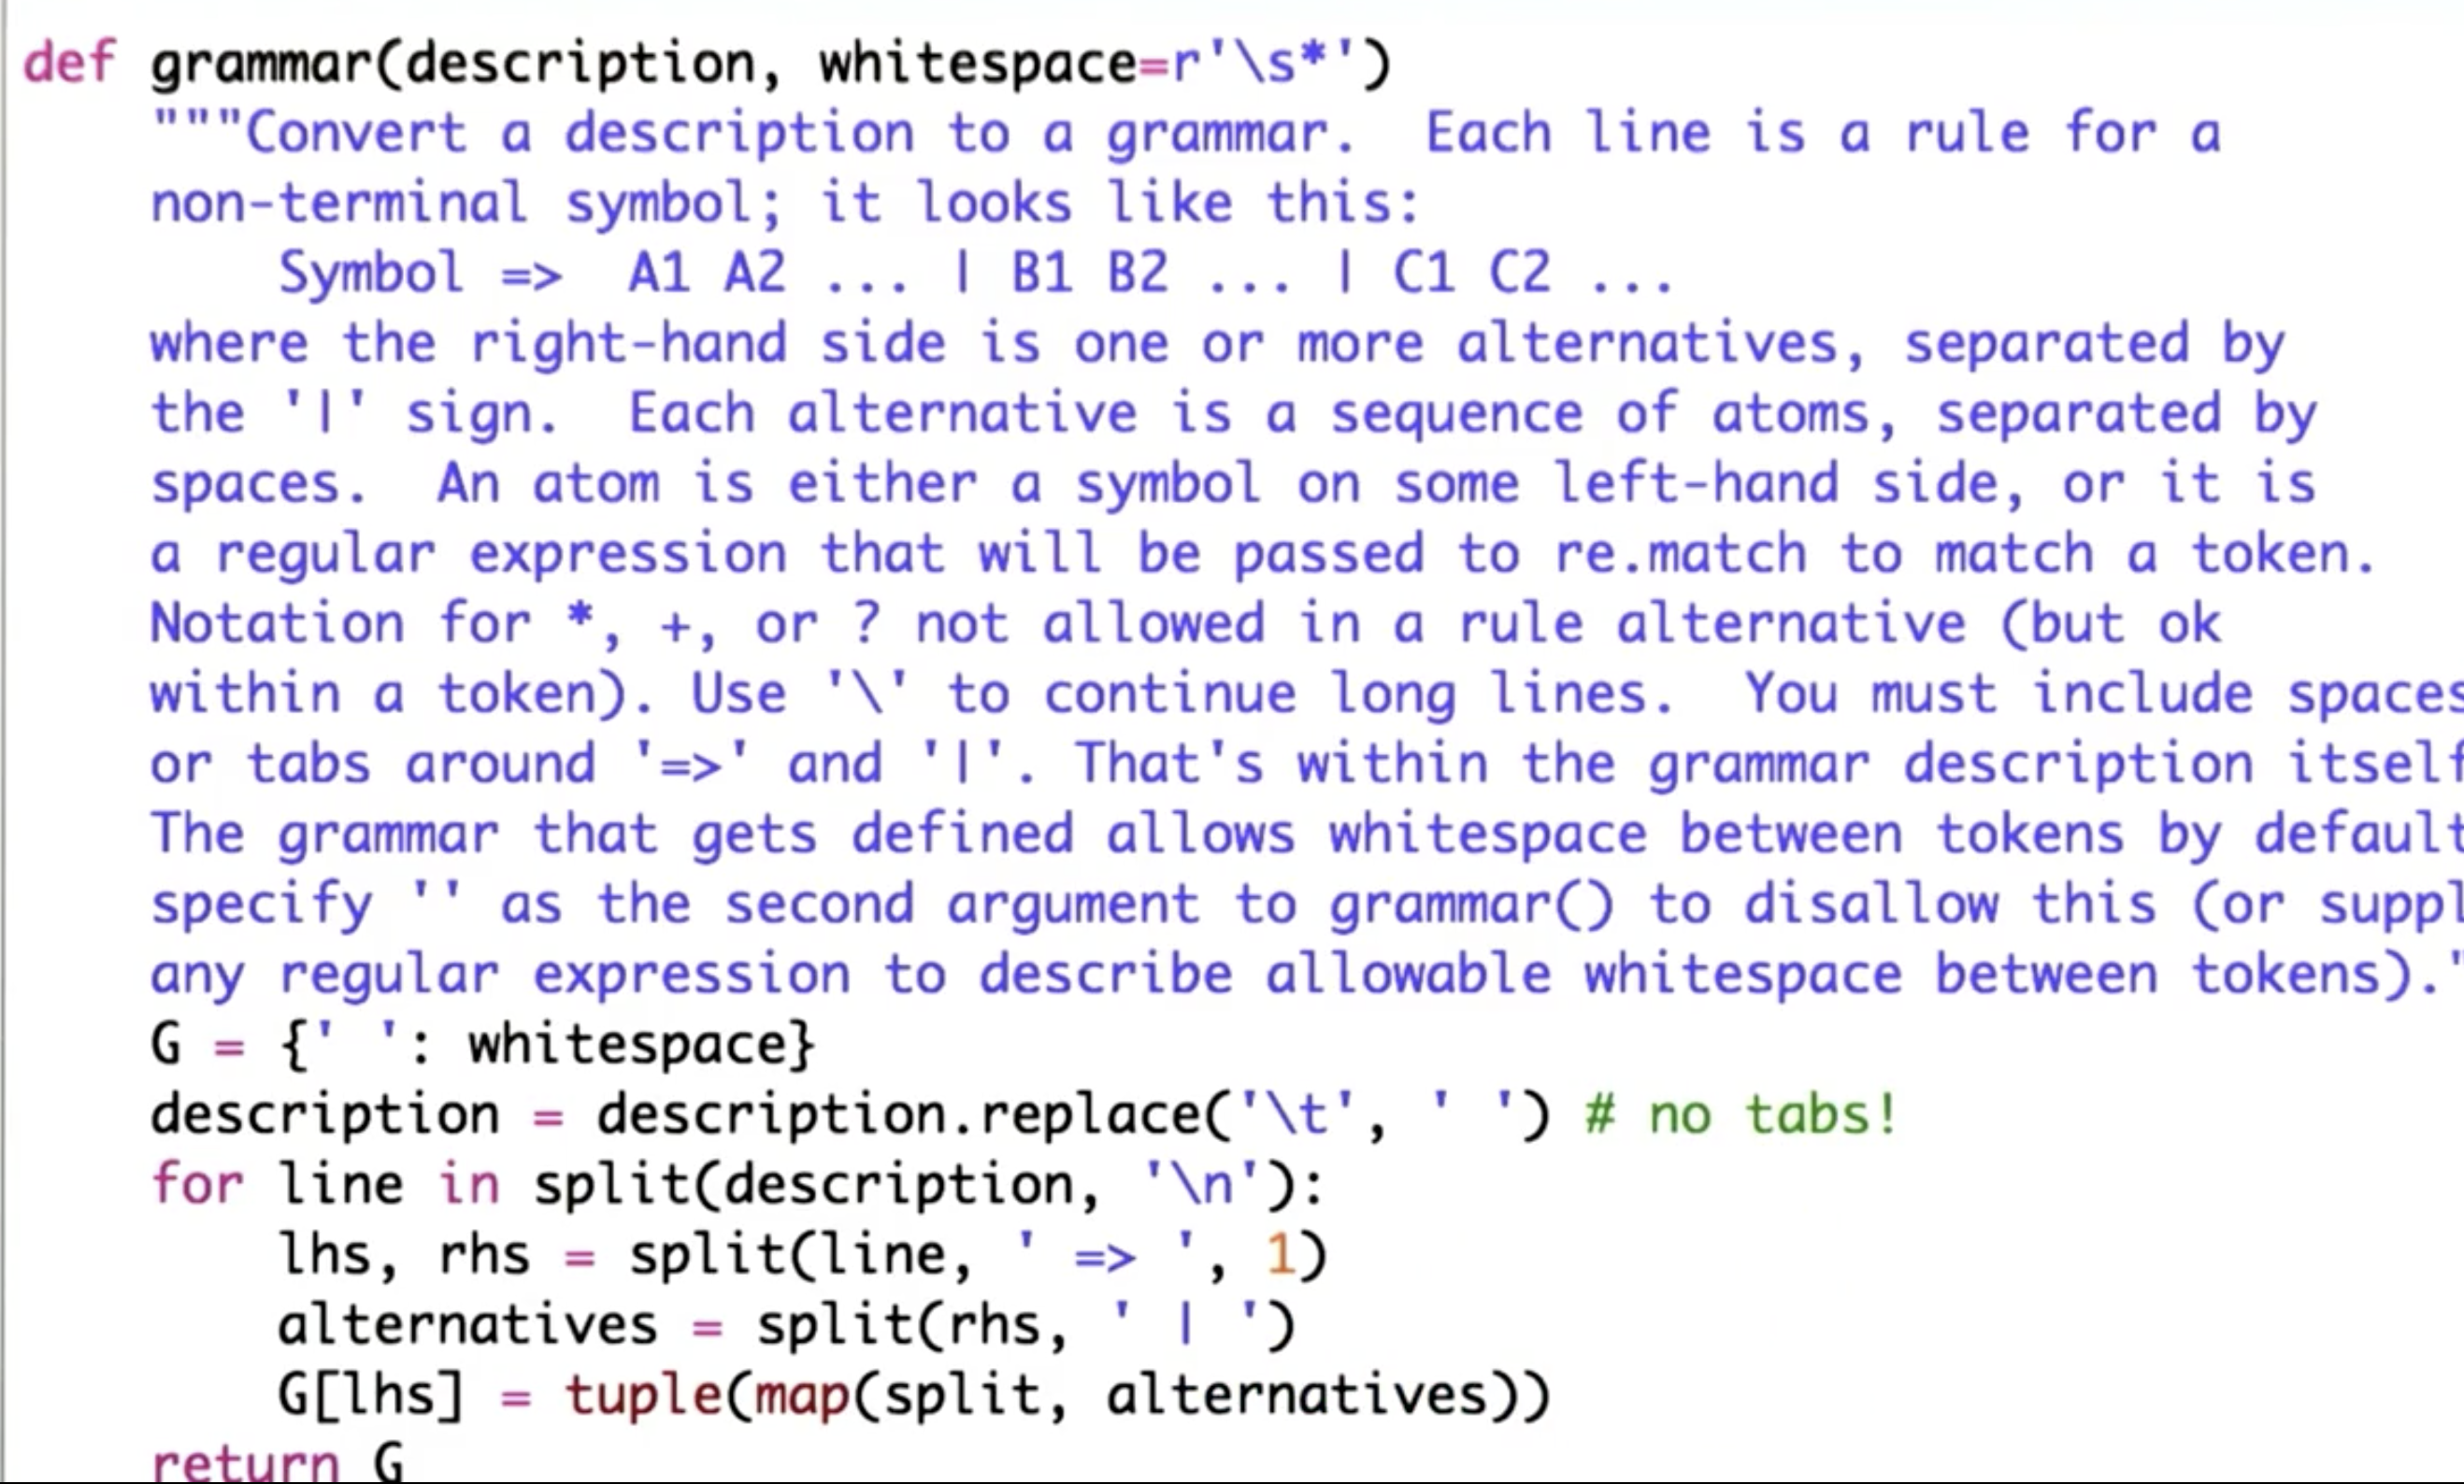

`parser(symbol, text, G) -> (tree, remainder)`


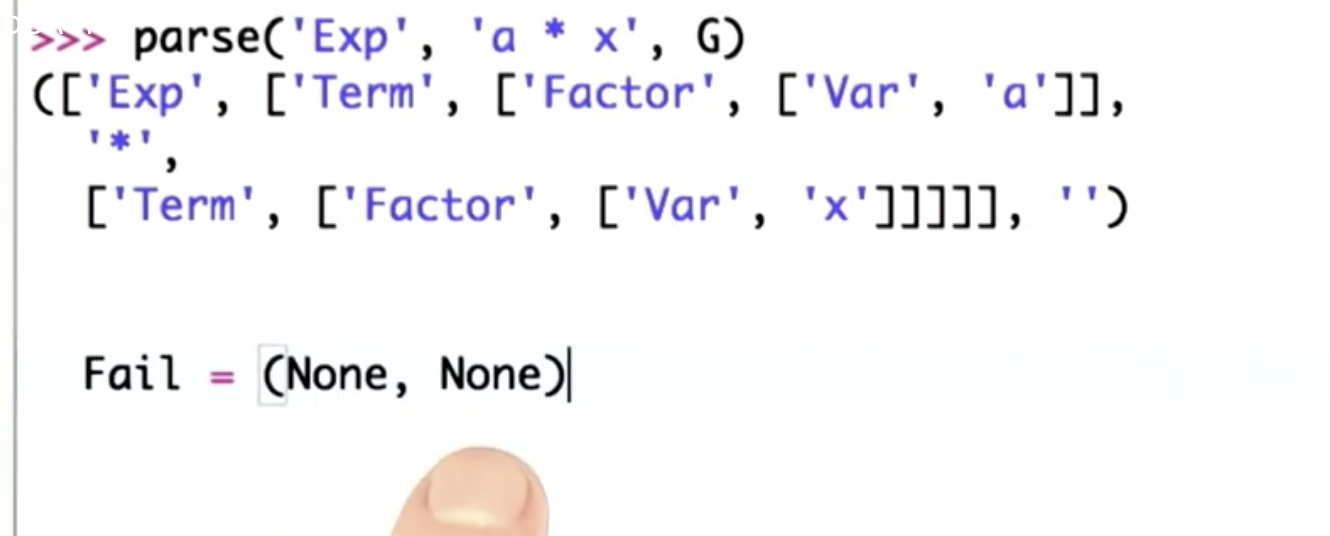

https://classroom.udacity.com/courses/cs212/lessons/48738183/concepts/486649850923

# Exercise
**User Instructions**

Modify the parse function so that it doesn't repeat computations.
You have learned about a tool in this unit that prevents
repetitive computations. Try using that!

For this question, the grader will be looking for a specific
solution.

Hint: it should only involve adding one line of code
(and that line should only contain 5 characters).

In [ ]:


from functools import update_wrapper
import re


def parse(start_symbol, text, grammar):
    """Example call: parse('Exp', '3*x + b', G).
    Returns a (tree, remainder) pair. If remainder is '', it parsed the whole
    string. Failure iff remainder is None. This is a deterministic PEG parser,
    so rule order (left-to-right) matters. Do 'E => T op E | T', putting the
    longest parse first; don't do 'E => T | T op E'
    Also, no left recursion allowed: don't do 'E => E op T'"""

    tokenizer = grammar[" "] + "(%s)"

    def parse_sequence(sequence, text):
        result = []
        for atom in sequence:
            tree, text = parse_atom(atom, text)
            if text is None:
                return Fail
            result.append(tree)
        return result, text

    @memo
    def parse_atom(atom, text):
        if atom in grammar:  # Non-Terminal: tuple of alternatives
            for alternative in grammar[atom]:
                tree, rem = parse_sequence(alternative, text)
                if rem is not None:
                    return [atom] + tree, rem
            return Fail
        else:  # Terminal: match characters against start of text
            m = re.match(tokenizer % atom, text)
            return Fail if (not m) else (m.group(1), text[m.end() :])

    # Body of parse:
    return parse_atom(start_symbol, text)


Fail = (None, None)

# The following decorators may help you solve this question. HINT HINT!


def decorator(d):
    "Make function d a decorator: d wraps a function fn."

    def _d(fn):
        return update_wrapper(d(fn), fn)

    update_wrapper(_d, d)
    return _d


@decorator
def memo(f):
    """Decorator that caches the return value for each call to f(args).
    Then when called again with same args, we can just look it up."""
    cache = {}

    def _f(*args):
        try:
            return cache[args]
        except KeyError:
            cache[args] = result = f(*args)
            return result
        except TypeError:
            # some element of args can't be a dict key
            return f(args)

    return _f

Grammer verifier


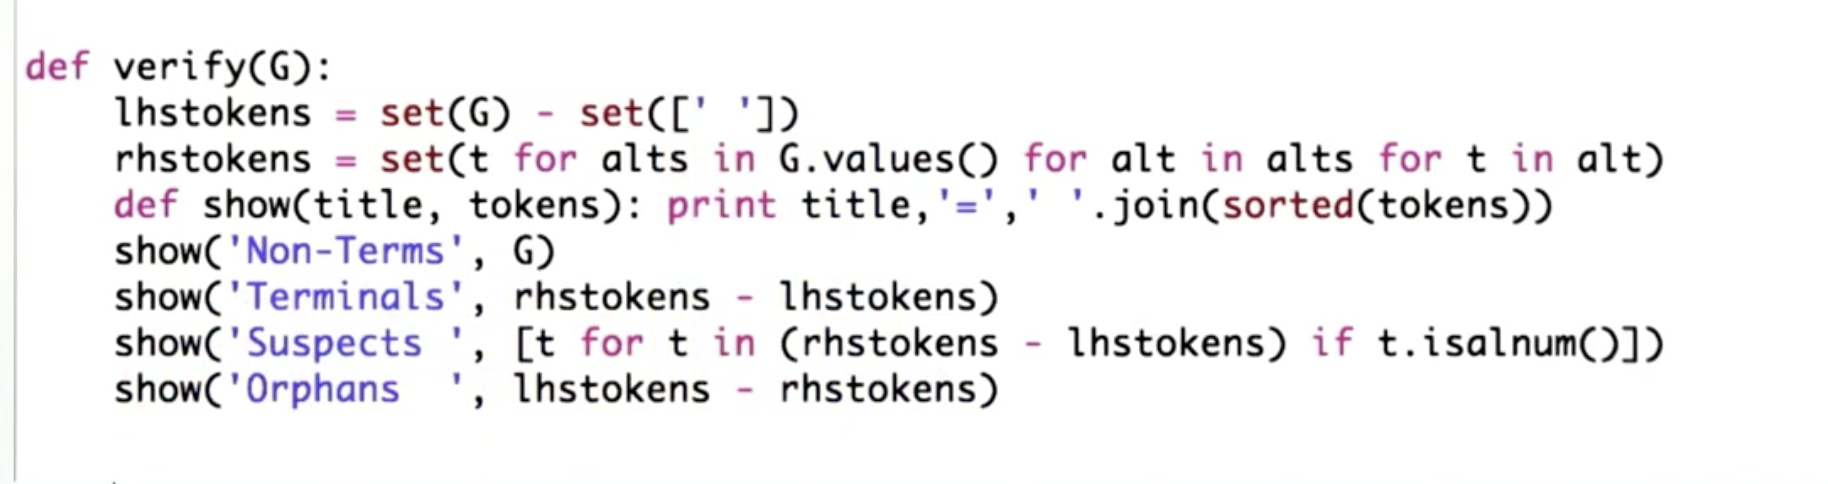

## Exercises

### 1

In [ ]:
# ---------------
# User Instructions
#
# In this problem, you will be using many of the tools and techniques
# that you developed in unit 3 to write a grammar that will allow
# us to write a parser for the JSON language.
#
# You will have to visit json.org to see the JSON grammar. It is not
# presented in the correct format for our grammar function, so you
# will need to translate it.

# ---------------
# Provided functions
#
# These are all functions that were built in unit 3. They will help
# you as you write the grammar.  Add your code at line 102.

In [ ]:
from functools import update_wrapper
from string import split
import re


def grammar(description, whitespace=r"\s*"):
    """Convert a description to a grammar.  Each line is a rule for a
    non-terminal symbol; it looks like this:
        Symbol =>  A1 A2 ... | B1 B2 ... | C1 C2 ...
    where the right-hand side is one or more alternatives, separated by
    the '|' sign.  Each alternative is a sequence of atoms, separated by
    spaces.  An atom is either a symbol on some left-hand side, or it is
    a regular expression that will be passed to re.match to match a token.

    Notation for *, +, or ? not allowed in a rule alternative (but ok
    within a token). Use '\' to continue long lines.  You must include spaces
    or tabs around '=>' and '|'. That's within the grammar description itself.
    The grammar that gets defined allows whitespace between tokens by default;
    specify '' as the second argument to grammar() to disallow this (or supply
    any regular expression to describe allowable whitespace between tokens)."""
    G = {" ": whitespace}
    description = description.replace("\t", " ")  # no tabs!
    for line in split(description, "\n"):
        lhs, rhs = split(line, " => ", 1)
        alternatives = split(rhs, " | ")
        G[lhs] = tuple(map(split, alternatives))
    return G


def decorator(d):
    "Make function d a decorator: d wraps a function fn."

    def _d(fn):
        return update_wrapper(d(fn), fn)

    update_wrapper(_d, d)
    return _d


@decorator
def memo(f):
    """Decorator that caches the return value for each call to f(args).
    Then when called again with same args, we can just look it up."""
    cache = {}

    def _f(*args):
        try:
            return cache[args]
        except KeyError:
            cache[args] = result = f(*args)
            return result
        except TypeError:
            # some element of args can't be a dict key
            return f(args)

    return _f


def parse(start_symbol, text, grammar):
    """Example call: parse('Exp', '3*x + b', G).
    Returns a (tree, remainder) pair. If remainder is '', it parsed the whole
    string. Failure iff remainder is None. This is a deterministic PEG parser,
    so rule order (left-to-right) matters. Do 'E => T op E | T', putting the
    longest parse first; don't do 'E => T | T op E'
    Also, no left recursion allowed: don't do 'E => E op T'"""

    tokenizer = grammar[" "] + "(%s)"

    def parse_sequence(sequence, text):
        result = []
        for atom in sequence:
            tree, text = parse_atom(atom, text)
            if text is None:
                return Fail
            result.append(tree)
        return result, text

    @memo
    def parse_atom(atom, text):
        if atom in grammar:  # Non-Terminal: tuple of alternatives
            for alternative in grammar[atom]:
                tree, rem = parse_sequence(alternative, text)
                if rem is not None:
                    return [atom] + tree, rem
            return Fail
        else:  # Terminal: match characters against start of text
            m = re.match(tokenizer % atom, text)
            return Fail if (not m) else (m.group(1), text[m.end() :])

    # Body of parse:
    return parse_atom(start_symbol, text)


Fail = (None, None)

JSON = grammar("""your code here""", whitespace="\s*")


def json_parse(text):
    return parse("value", text, JSON)


def test():
    assert json_parse('["testing", 1, 2, 3]') == (
        [
            "value",
            [
                "array",
                "[",
                [
                    "elements",
                    ["value", ["string", '"testing"']],
                    ",",
                    [
                        "elements",
                        ["value", ["number", ["int", "1"]]],
                        ",",
                        [
                            "elements",
                            ["value", ["number", ["int", "2"]]],
                            ",",
                            ["elements", ["value", ["number", ["int", "3"]]]],
                        ],
                    ],
                ],
                "]",
            ],
        ],
        "",
    )

    assert json_parse("-123.456e+789") == (
        ["value", ["number", ["int", "-123"], ["frac", ".456"], ["exp", "e+789"]]],
        "",
    )

    assert json_parse('{"age": 21, "state":"CO","occupation":"rides the rodeo"}') == (
        [
            "value",
            [
                "object",
                "{",
                [
                    "members",
                    [
                        "pair",
                        ["string", '"age"'],
                        ":",
                        ["value", ["number", ["int", "21"]]],
                    ],
                    ",",
                    [
                        "members",
                        [
                            "pair",
                            ["string", '"state"'],
                            ":",
                            ["value", ["string", '"CO"']],
                        ],
                        ",",
                        [
                            "members",
                            [
                                "pair",
                                ["string", '"occupation"'],
                                ":",
                                ["value", ["string", '"rides the rodeo"']],
                            ],
                        ],
                    ],
                ],
                "}",
            ],
        ],
        "",
    )
    return "tests pass"


print(test())

### 2

In [ ]:
# --------------
# User Instructions
#
# Write a function, inverse, which takes as input a monotonically
# increasing (always increasing) function that is defined on the
# non-negative numbers. The runtime of your program should be
# proportional to the LOGARITHM of the input. You may want to
# do some research into binary search and Newton's method to
# help you out.
#
# This function should return another function which computes the
# inverse of the input function.
#
# Your inverse function should also take an optional parameter,
# delta, as input so that the computed value of the inverse will
# be within delta of the true value.

# -------------
# Grading Notes
#
# Your function will be called with three test cases. The
# input numbers will be large enough that your submission
# will only terminate in the allotted time if it is
# efficient enough.

In [ ]:
def slow_inverse(f, delta=1 / 128.0):
    """Given a function y = f(x) that is a monotonically increasing function on
    non-negatve numbers, return the function x = f_1(y) that is an approximate
    inverse, picking the closest value to the inverse, within delta."""

    def f_1(y):
        x = 0
        while f(x) < y:
            x += delta
        # Now x is too big, x-delta is too small; pick the closest to y
        return x if (f(x) - y < y - f(x - delta)) else x - delta

    return f_1


def inverse(f, delta=1 / 128.0):
    """Given a function y = f(x) that is a monotonically increasing function on
    non-negatve numbers, return the function x = f_1(y) that is an approximate
    inverse, picking the closest value to the inverse, within delta."""


def square(x):
    return x * x


sqrt = slow_inverse(square)

print(sqrt(1000000000))

### 3

In [ ]:
# ---------------
# User Instructions
#
# Write a function, findtags(text), that takes a string of text
# as input and returns a list of all the html start tags in the 
# text. It may be helpful to use regular expressions to solve
# this problem.

In [ ]:
import re


def findtags(text):
    # your code here
    pass


testtext1 = """
My favorite website in the world is probably 
<a href="www.udacity.com">Udacity</a>. If you want 
that link to open in a <b>new tab</b> by default, you should
write <a href="www.udacity.com"target="_blank">Udacity</a>
instead!
"""

testtext2 = """
Okay, so you passed the first test case. <let's see> how you 
handle this one. Did you know that 2 < 3 should return True? 
So should 3 > 2. But 2 > 3 is always False.
"""

testtext3 = """
It's not common, but we can put a LOT of whitespace into 
our HTML tags. For example, we can make something bold by
doing <         b           > this <   /b    >, Though I 
don't know why you would ever want to.
"""


def test():
    assert findtags(testtext1) == [
        '<a href="www.udacity.com">',
        "<b>",
        '<a href="www.udacity.com"target="_blank">',
    ]
    assert findtags(testtext2) == []
    assert findtags(testtext3) == ["<         b           >"]
    return "tests pass"


print(test())